

## Problem definition: 

***According to the Centers For Disease Control and Prevention, Heart diseases are the leading cause of death all around the world. We will built a system that can easily detect heart disease using machine learning algorithms.***



In [56]:
# Load Packages
import pandas as pd
import numpy as np

#Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.simplefilter('ignore')

In [57]:
data = pd.read_csv("heart_2020.csv")

In [58]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [59]:
data.shape

(319795, 18)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# 1. Data Preparation

### Checking for Missing Values

In [61]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

*Data has no missing values.*

### Checking for Duplicate values

In [62]:
data.duplicated().any()

True

In [63]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [64]:
 # drop duplicate entries
data = data.drop_duplicates()

In [65]:
data.duplicated().any()

False

In [66]:
data.shape

(301717, 18)

# 2. Exploratory Data Analysis (EDA)


In [67]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [69]:
data['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

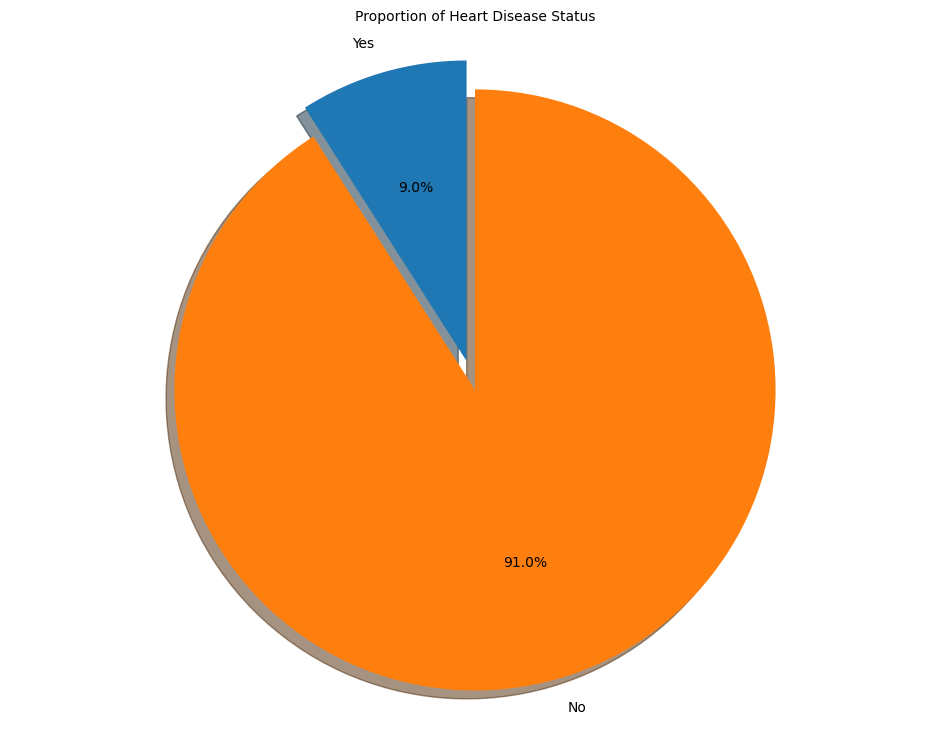

In [70]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Yes', 'No'
sizes = [data.HeartDisease[data['HeartDisease']=='Yes'].count(), data.HeartDisease[data['HeartDisease']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Heart Disease Status", size = 10)
plt.show()

*From above pie chart,we can see that around 9% of the person has Heart Disease whereas 91% people are healthy which indicates that the distribution is quite imbalance.*

In [71]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

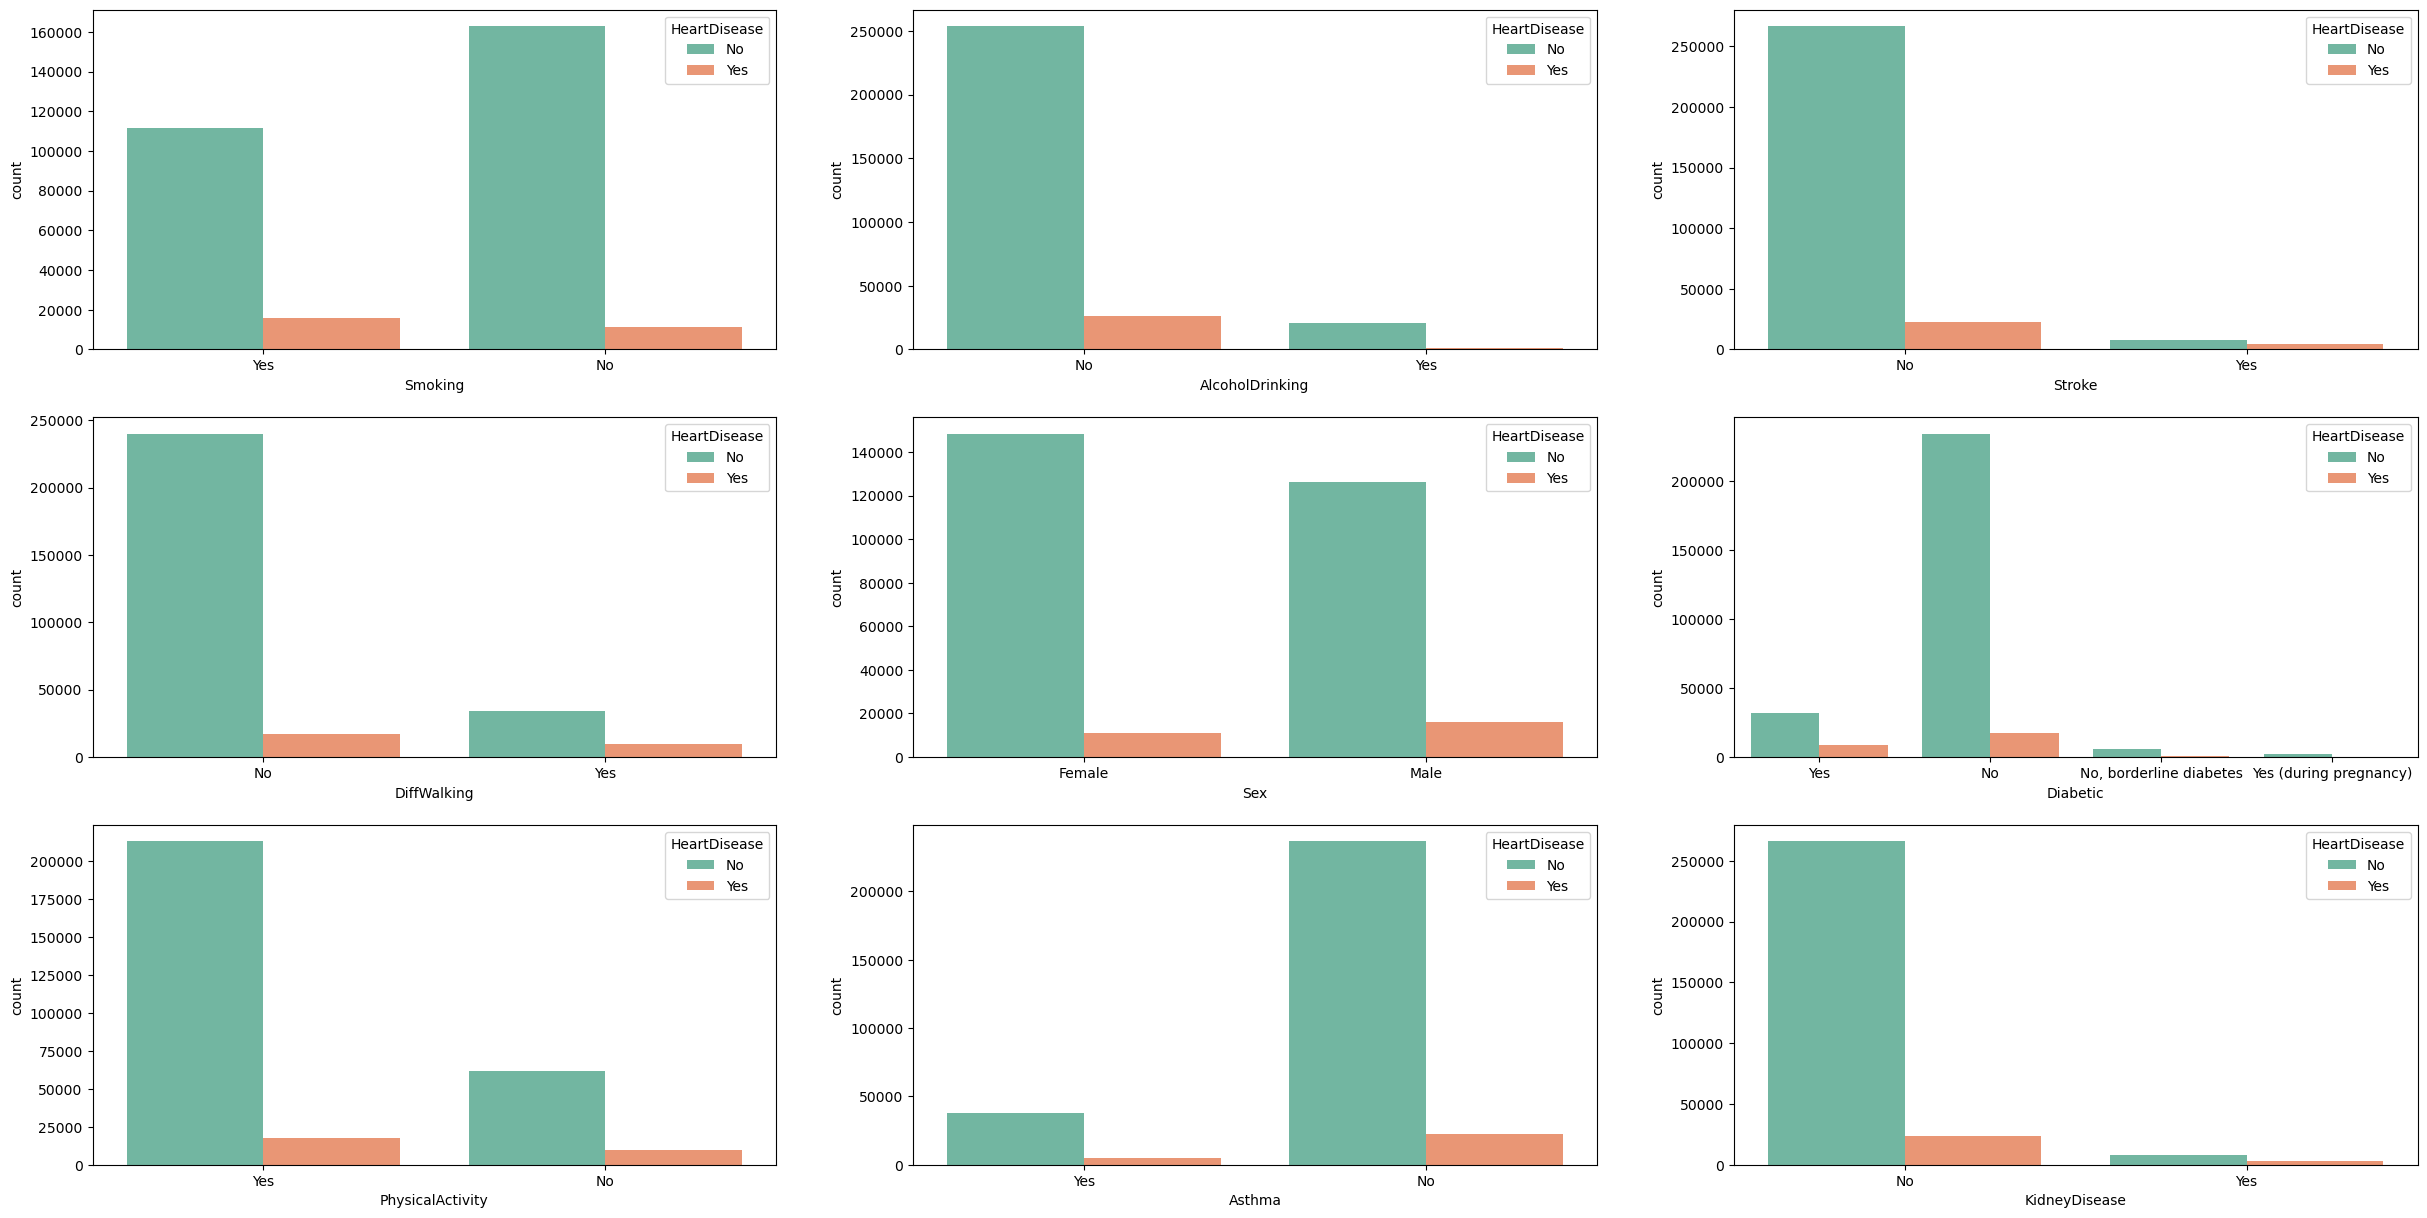

In [72]:
# Count column plots to map the dependence of 'Heart Disease' column on categorical features

fig, ax = plt.subplots(3, 3, figsize=(30, 15))

sns.countplot(x='Smoking', hue='HeartDisease', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='AlcoholDrinking', hue='HeartDisease', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='Stroke', hue='HeartDisease', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='DiffWalking', hue='HeartDisease', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='Sex', hue='HeartDisease', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Diabetic', hue='HeartDisease', data=data, palette='Set2', ax=ax[1][2])
sns.countplot(x='PhysicalActivity', hue='HeartDisease', data=data, palette='Set2', ax=ax[2][0])
sns.countplot(x='Asthma', hue='HeartDisease', data=data, palette='Set2', ax=ax[2][1])
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=data, palette='Set2', ax=ax[2][2])

plt.show()

<Axes: xlabel='GenHealth', ylabel='count'>

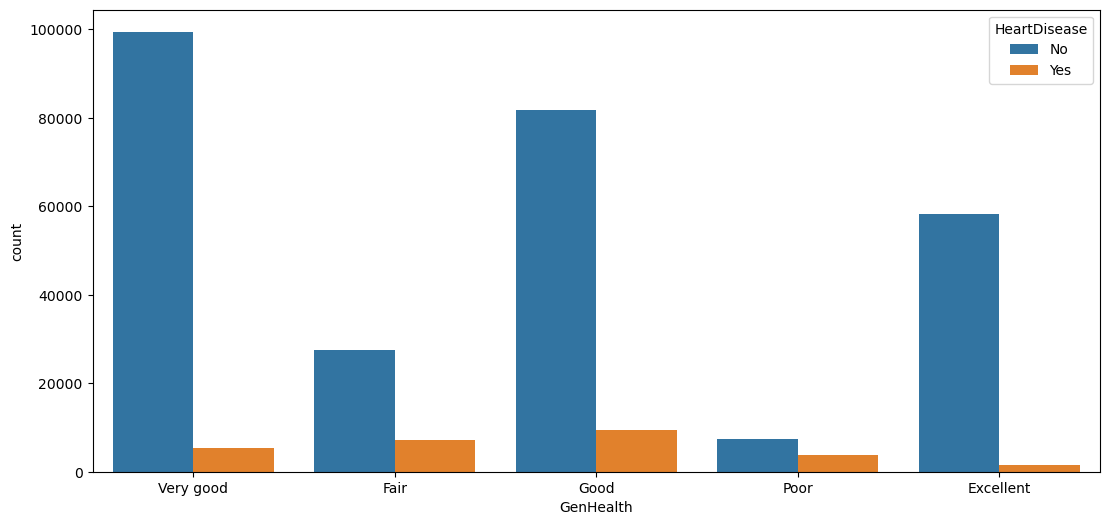

In [73]:
plt.figure(figsize=(13,6))
sns.countplot(x='GenHealth', hue='HeartDisease', data=data)

#### **Insights**

1. People drinking alcohol generally doesn't have problem of heart attack and there are evidences that doctors recommend wine to heart patients, but people who do not drink alcohol have heart disease is very contradictory.
2. People with Asthma have problem of heart disease and this can also be linked with smoking.
3. People with diabetes diff walking hence and physical activity have heart disease.
4. Gen Health have no correlaion to the class as heart diseas can happen to anyone.
5. Males have higher proportion of heart diseases.

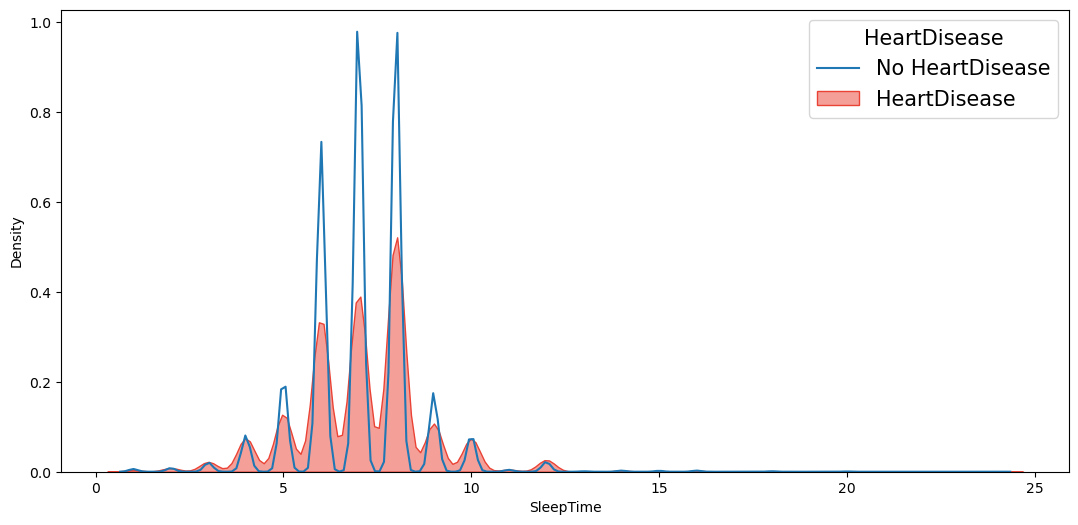

In [81]:
plt.figure(figsize=(13,6))
sns.kdeplot(data[data["HeartDisease"]=='No']["SleepTime"], label="No HeartDisease")
sns.kdeplot(data[data["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease")
plt.legend(title='HeartDisease', fontsize=15, title_fontsize=15)
plt.show()

*If your sleeping time is 7-8 hrs then there is no chance of heart disease.*

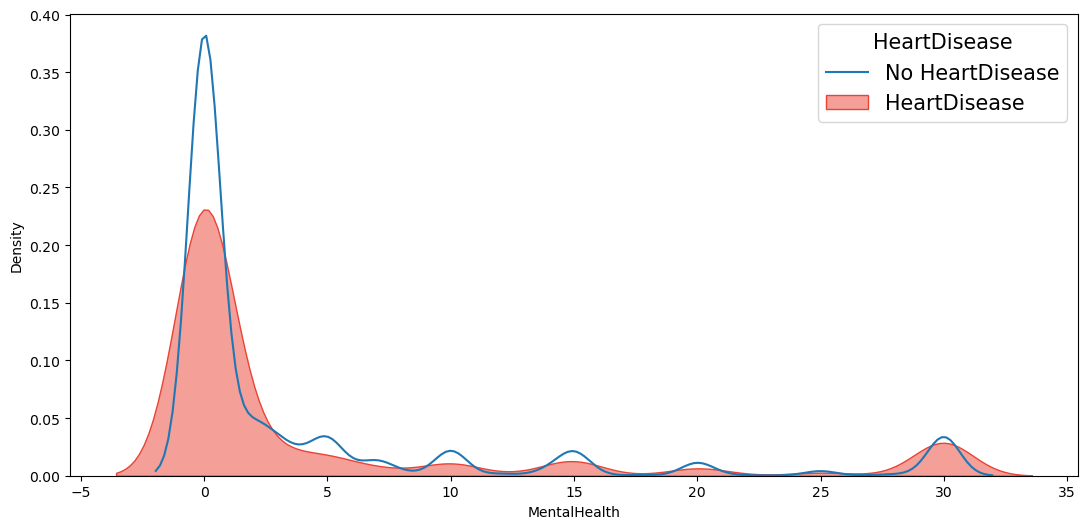

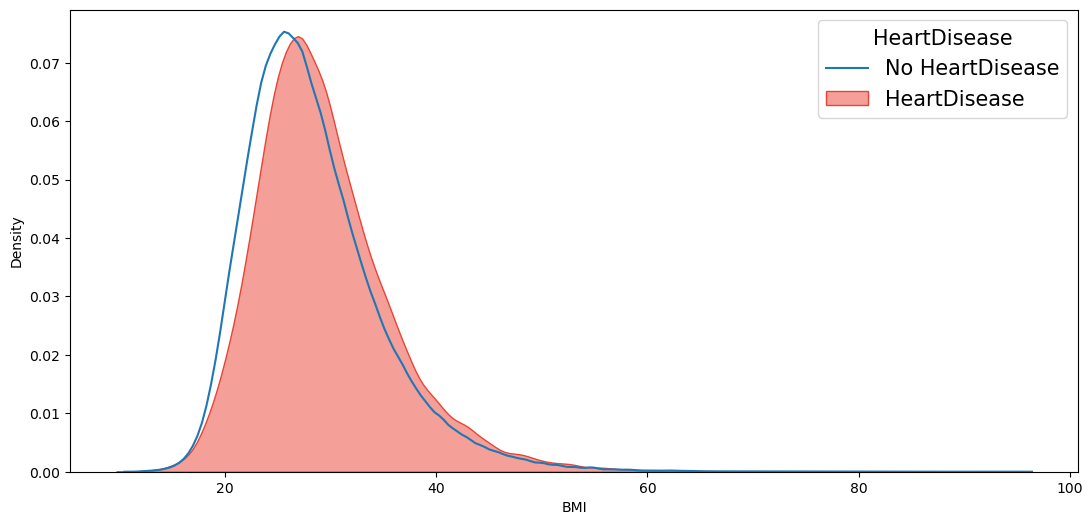

In [82]:
plt.figure(figsize=(13,6))
sns.kdeplot(data[data["HeartDisease"]=='No']["MentalHealth"], label="No HeartDisease")
sns.kdeplot(data[data["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease")
plt.legend(title='HeartDisease', fontsize=15, title_fontsize=15)
plt.show()

plt.figure(figsize=(13,6))
sns.kdeplot(data[data["HeartDisease"]=='No']["BMI"], label="No HeartDisease")
sns.kdeplot(data[data["HeartDisease"]=='Yes']["BMI"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease")
plt.legend(title='HeartDisease', fontsize=15, title_fontsize=15)
plt.show()

*BMI and Mental Health does not have any good relation with the heart disease.*

# 3. Feature Engineering / Feature Selection

In [83]:
# Handling AgeCategory column
Age = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: Age[x])

In [84]:
# Converting string into integer
data['AgeCategory'] = data['AgeCategory'].astype('int')

In [85]:
data.rename(columns = {'AgeCategory':'Age'}, inplace = True)

In [86]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,77,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42,White,No,Yes,Very good,8.0,No,No,No


### **Outlier Detection**

In [87]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,Age,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,54.325964,7.084559
std,6.468134,8.140656,8.128288,17.814606,1.467122
min,12.020000,0.000000,0.000000,21.000000,1.000000
25%,24.030000,0.000000,0.000000,42.000000,6.000000
50%,27.410000,0.000000,0.000000,57.000000,7.000000
75%,31.650000,2.000000,4.000000,67.000000,8.000000
max,94.850000,30.000000,30.000000,80.000000,24.000000


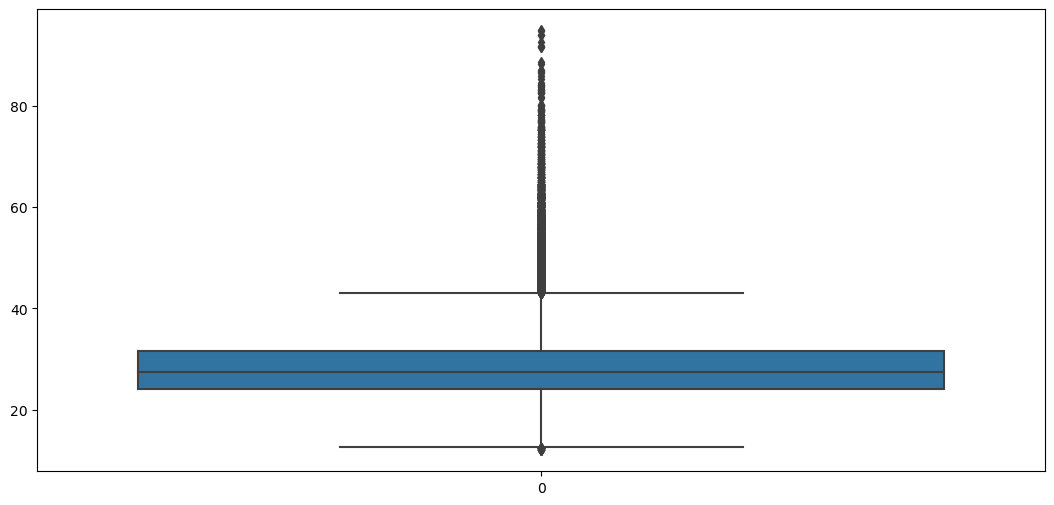

In [88]:
# Outlier Analysis before treatment
plt.figure(figsize=(13,6))
sns.boxplot(data['BMI'])
plt.show()

*We can observe that BMI has so many outliers and since the data is not normally distributed we need to use IQR techniue to handle the outliers.**

In [89]:
# Outlier treatment for BMI

Q1 = data.BMI.quantile(0.25)
Q3 = data.BMI.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.BMI >= Q1 - 1.5*IQR) & (data.BMI <= Q3 + 1.5*IQR)]

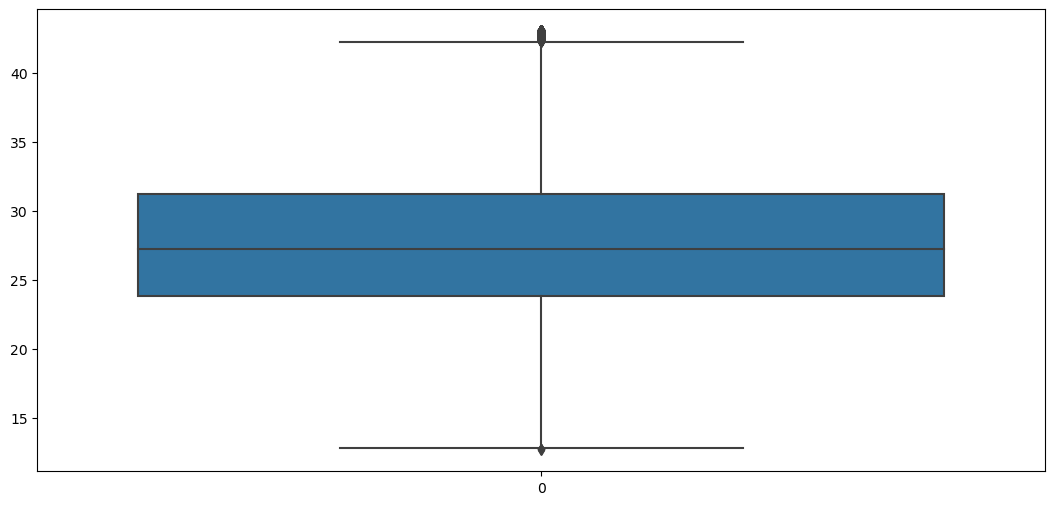

In [90]:
# Outlier Analysis after treatment
plt.figure(figsize=(13,6))
sns.boxplot(data['BMI'])
plt.show()

### Feature Selection

#### **Pearson Correlation Test**

*Pearson correlation is used to measure how strong the relationship is between two variables.*

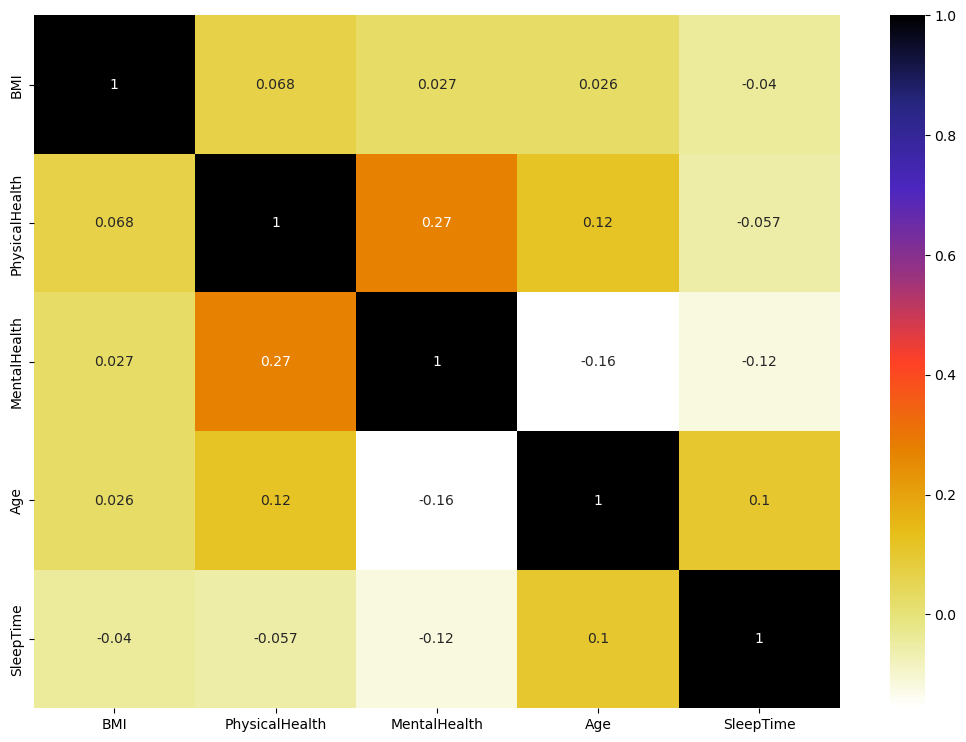

In [91]:
#Displaying Correlation between varaibles using heatmap

plt.figure(figsize=(13, 9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

*From the above plot, we can observe that no features are correlated with each other.*

#### **Handling Categorical Data**

*Use Label Encoding Technique to convert categorical data into numerical values.*

In [92]:
# Getting list of categorical variable

objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [93]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting all categorical variable to numerical values
for feat in objList:
    data[feat] = le.fit_transform(data[feat])

In [94]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,5,0,1,4,8.0,0,0,0


In [95]:
data.shape

(292812, 18)

#### **Chi-Square Test**

*Chi-Square test to check how each input categorical data impacting the target variable.*

In [96]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [97]:
from sklearn.feature_selection import chi2

#split df dataset in features and target variable
cat_data = data[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer']]
y = data['HeartDisease']

In [98]:
#returns f score and p value 
f_score = chi2(cat_data, y)

In [99]:
p_value = pd.Series(f_score[1],index = cat_data.columns)
# sort p value series
p_value = p_value.sort_values(ascending = True)
# print p value 
print(p_value)

Smoking              0.000000e+00
Stroke               0.000000e+00
DiffWalking          0.000000e+00
Diabetic             0.000000e+00
KidneyDisease        0.000000e+00
SkinCancer           0.000000e+00
Sex                 1.182382e-189
PhysicalActivity    3.553746e-126
AlcoholDrinking      7.027044e-83
Asthma               4.083969e-64
Race                 3.631853e-44
GenHealth            3.872261e-11
dtype: float64


#### **According to Chi-Square (Test of Independence)**

1. Null Hypothesis -> Features are independent to each other.
2. Alternate Hypothesis -> Features are dependent.



*  If p-value ≥ 0.05, we failed to reject null hypothesis there is no relationship between target variable and input categorical features.

*  If p_value < 0.05, we can reject the null hypothesis that means target variables are dependent on input categorical variable.



In [100]:
significance_level = 0.05
for i in p_value.index:
    if p_value[i] <= significance_level: 
        print(i,'    :- Reject NULL HYPOTHESIS') 
    else: 
        print(i,'   :-ACCEPT NULL HYPOTHESIS')

Smoking     :- Reject NULL HYPOTHESIS
Stroke     :- Reject NULL HYPOTHESIS
DiffWalking     :- Reject NULL HYPOTHESIS
Diabetic     :- Reject NULL HYPOTHESIS
KidneyDisease     :- Reject NULL HYPOTHESIS
SkinCancer     :- Reject NULL HYPOTHESIS
Sex     :- Reject NULL HYPOTHESIS
PhysicalActivity     :- Reject NULL HYPOTHESIS
AlcoholDrinking     :- Reject NULL HYPOTHESIS
Asthma     :- Reject NULL HYPOTHESIS
Race     :- Reject NULL HYPOTHESIS
GenHealth     :- Reject NULL HYPOTHESIS


*We can observe from chi-square test that every feature have some relation with the target variable, i.e., these input features is important for making prediction.*

# 4. Data Pre-processing (Splitting & Balancing the dataset)

In [101]:
X = data.drop('HeartDisease', axis = 1)
y = data.HeartDisease

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
# Making Prediction

y_pred_dt = dt.predict(X_test)

In [107]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt))
print("AUC-Score: ", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.8552518339412319
F1-Score:  0.23659942363112393
AUC-Score:  0.5828719410798582
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     66669
           1       0.22      0.25      0.24      6534

    accuracy                           0.86     73203
   macro avg       0.57      0.58      0.58     73203
weighted avg       0.86      0.86      0.86     73203



In [108]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
X_sm, y_sm = sm.fit_resample(X, y)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 23)

# 5. Model Building & Evaluation

In [110]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score

### 1. Fitting Decision Tree Classifier

In [111]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [112]:
# Making Prediction

y_pred_dt = dt.predict(X_test)

In [114]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt))
print("AUC-Score: ", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.8657307712508535
F1-Score:  0.8675866661733693
AUC-Score:  0.8657219908945681
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     66595
           1       0.86      0.88      0.87     66682

    accuracy                           0.87    133277
   macro avg       0.87      0.87      0.87    133277
weighted avg       0.87      0.87      0.87    133277



#### **Plotting Confusion Matrix**

*Since the evaluation score (Accuracy score & F1-score) of Random Forest is highest, we can plot the confusion matrix for the result we got with Random Forest.*

Text(87.0, 0.5, 'Truth')

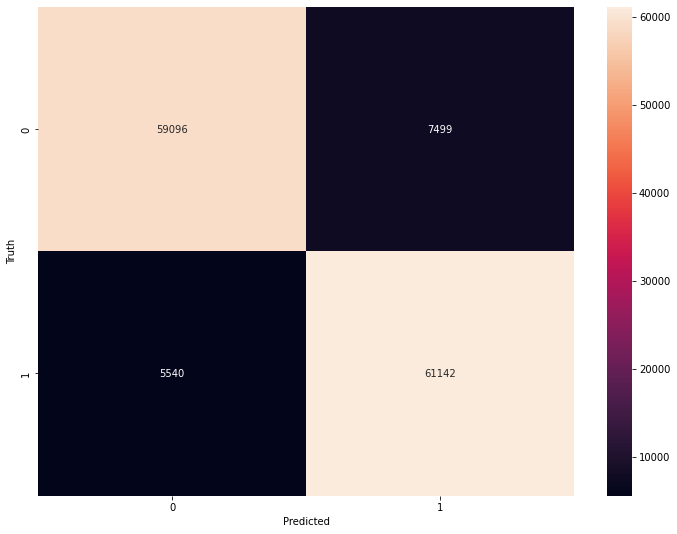

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Building a Predictive System

In [ ]:
X_test.loc[293857].T

BMI                 21.495233
Smoking              1.000000
AlcoholDrinking      0.000000
Stroke               0.000000
PhysicalHealth       0.000000
MentalHealth         1.030051
DiffWalking          0.000000
Sex                  1.000000
Age                 62.000000
Race                 5.000000
Diabetic             0.000000
PhysicalActivity     0.000000
GenHealth            2.000000
SleepTime            8.000000
Asthma               0.000000
KidneyDisease        0.000000
SkinCancer           0.000000
Name: 293857, dtype: float64

In [ ]:
input_data = (21.495233, 1, 0, 0, 0, 1, 0, 1, 62.000000, 5, 0, 0, 2, 8, 0, 0, 0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [ ]:
# saving the model 
import pickle 
pickle_out = open("/content/drive/MyDrive/Heart Disease/Heart Disease Prediction Model.pkl", mode = "wb") 
pickle.dump(rf, pickle_out) 
pickle_out.close()